In [39]:
import pandas as pd

In [41]:
df= pd.read_csv('income.csv')


In [43]:
!pip install pandas


In [44]:
import pandas as pd


In [45]:
df = pd.read_csv('income.csv')

In [46]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [47]:
df.education.value counts()

SyntaxError: invalid syntax (4127423639.py, line 1)

In [ ]:
df.education.value_counts()

In [ ]:
df.workclass.value_counts()

In [53]:
df = pd.concat([ df.drop('occupation', axis = 1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis = 1)
df = pd.concat([ df.drop('workclass', axis = 1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis = 1)
df = df.drop('education', axis= 1)
df = pd.concat([ df.drop('marital-status', axis = 1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis = 1)
df = pd.concat([ df.drop('relationship', axis = 1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis = 1)
df = pd.concat([ df.drop('race', axis = 1), pd.get_dummies(df.race).add_prefix('race_')], axis = 1)
df = pd.concat([ df.drop('native-country', axis = 1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis = 1)

In [55]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,Male,0,0,20,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False


In [66]:
df['gender'] = df['gender'].apply( lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply( lambda x: 1 if x == '>50K' else 0)

In [68]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

<Axes: >

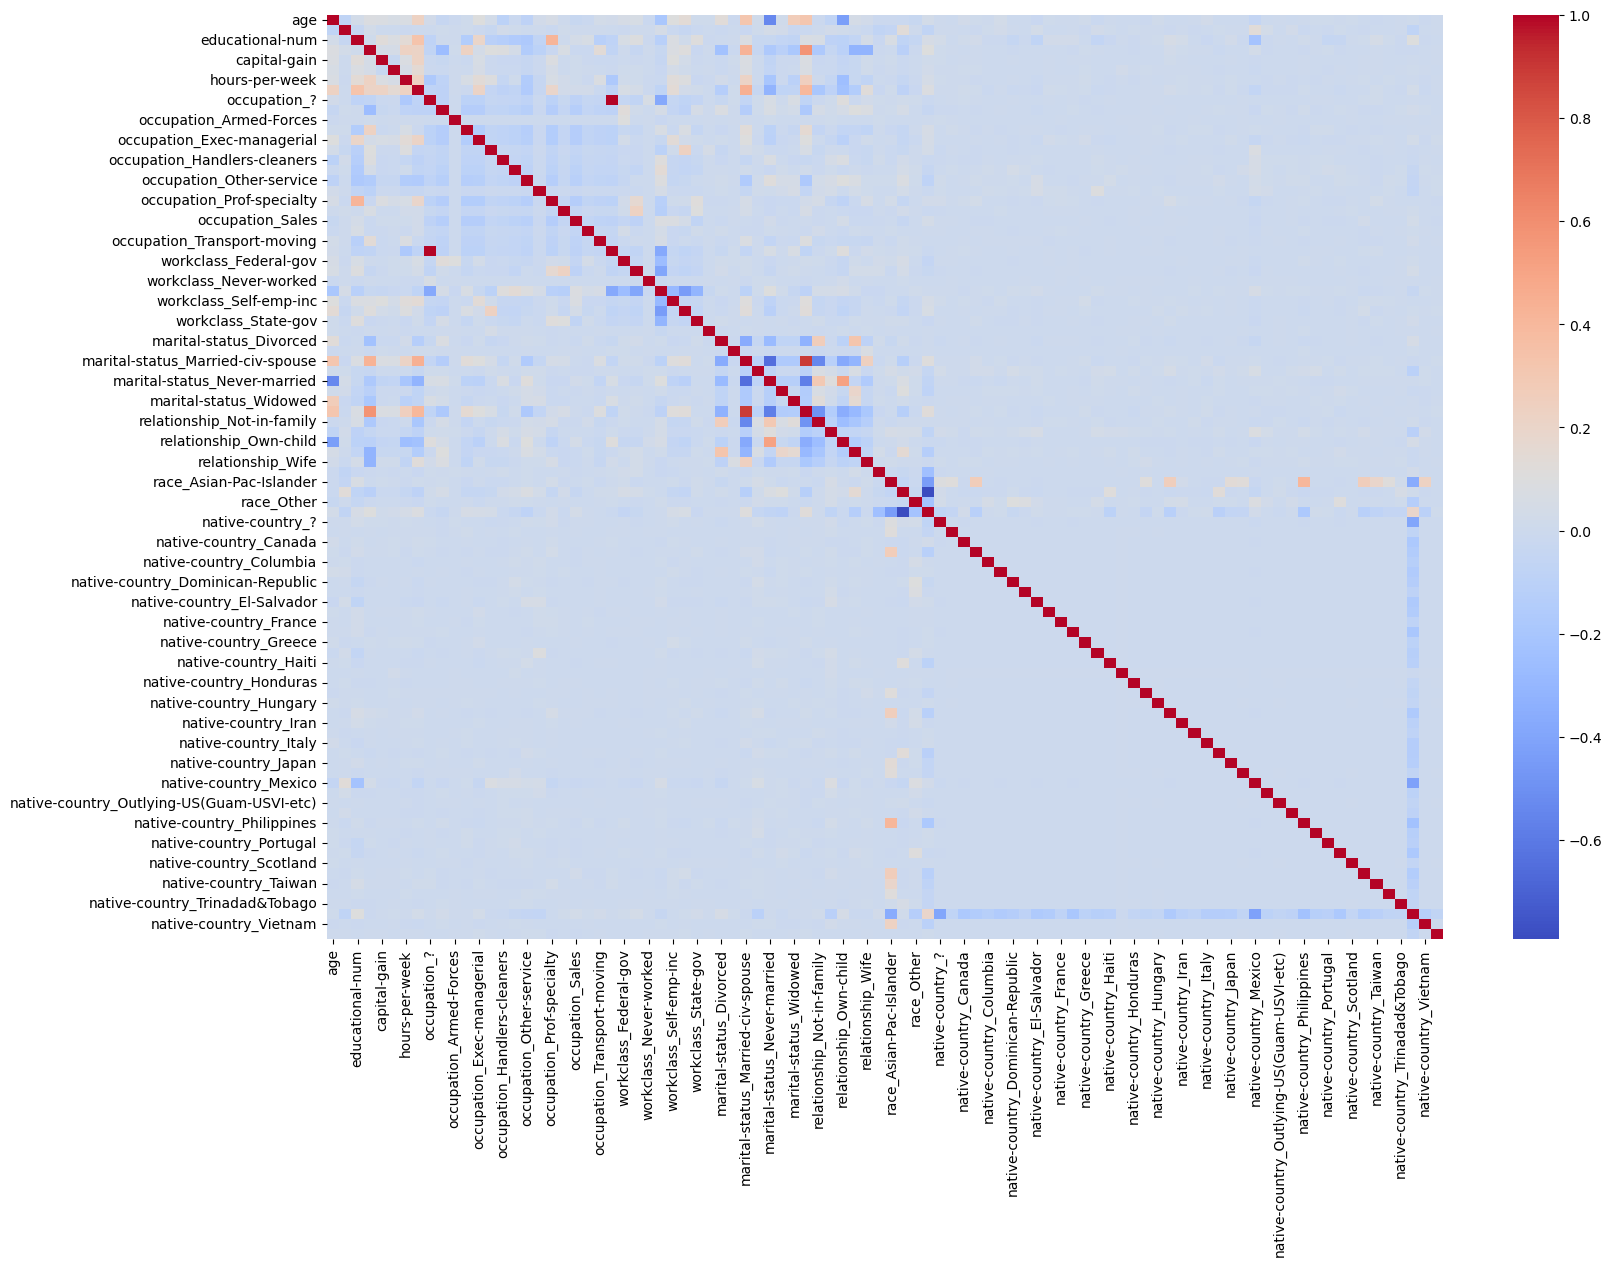

In [70]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize= (18,12))
sns.heatmap(df.corr(),annot=False, cmap='coolwarm')

In [74]:
correlations= df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8*len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis = 1)

In [76]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

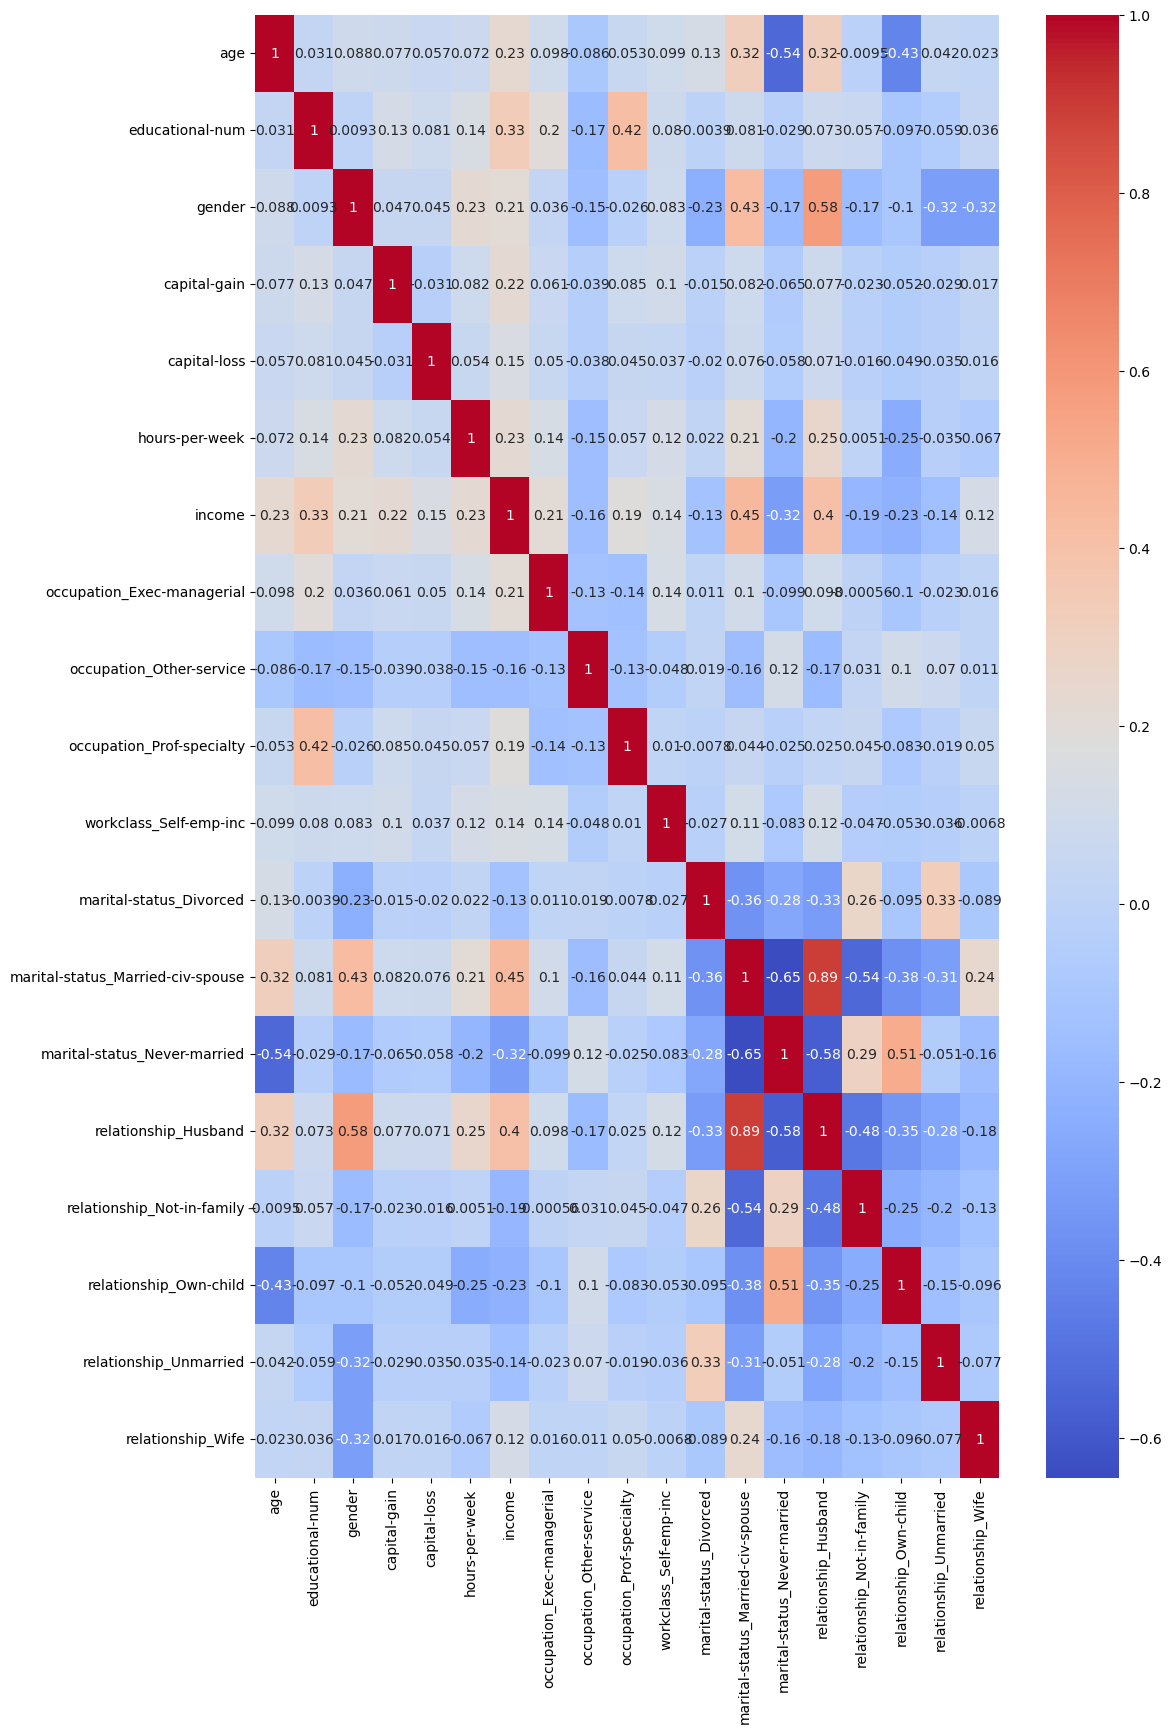

In [78]:
plt.figure(figsize= (12,19))
sns.heatmap(df_dropped.corr(), annot= True, cmap= 'coolwarm')

In [110]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis =1)
train_df, test_df = train_test_split(df, test_size= 0.2)

In [112]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
47734,33,9,1,0,0,55,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7511,68,2,0,0,0,40,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
24639,42,9,0,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
36505,37,15,1,0,0,50,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7977,27,13,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40531,37,13,1,0,0,60,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
38046,22,10,1,0,0,35,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
16623,36,9,1,7298,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
21313,20,10,1,0,0,24,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [114]:
train_x = train_df.drop('income', axis=1)
train_y= train_df['income']

test_x = test_df.drop('income', axis=1)
test_y= test_df['income']


In [116]:
forest= RandomForestClassifier()

forest.fit(train_x, train_y)

RandomForestClassifier()

In [117]:
forest.score(test_x,test_y)

0.8499334629951889

In [118]:
forest.feature_importances_

array([2.27340291e-01, 1.29329950e-01, 1.26455202e-02, 1.08536825e-01,
       3.73698763e-02, 1.13125897e-01, 1.59652517e-03, 5.14064816e-03,
       6.10566038e-05, 6.27783111e-03, 1.99691335e-02, 5.01398554e-03,
       3.60110118e-03, 3.83351524e-03, 7.44407202e-03, 1.99514550e-04,
       1.89692709e-02, 2.93045322e-03, 6.28539018e-03, 4.25254024e-03,
       4.12845772e-03, 1.93271251e-03, 5.09332094e-03, 5.64443059e-03,
       3.49001403e-06, 9.50575394e-03, 6.05508251e-03, 8.47962944e-03,
       4.48204147e-03, 5.07908255e-05, 7.18958545e-03, 3.84605829e-04,
       5.78092746e-02, 1.00775156e-03, 2.91829960e-02, 2.06056033e-03,
       1.93992710e-03, 5.63112306e-02, 1.15353686e-02, 1.69517032e-03,
       9.95204083e-03, 7.02946938e-03, 1.11614860e-02, 1.43711928e-03,
       3.04579442e-03, 4.30160068e-03, 9.90312274e-04, 5.88807750e-03,
       2.73873249e-03, 3.28344474e-04, 1.49106532e-03, 4.81138070e-04,
       3.48952040e-04, 8.84366457e-04, 2.18580320e-04, 1.88106474e-04,
      

In [119]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [120]:
importances= dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances= {k: v for k, v in sorted(importances.items(), key= lambda x : x[1], reverse= True)}

In [124]:
importances

{'age': 0.22734029095251063,
 'educational-num': 0.12932995042055825,
 'hours-per-week': 0.113125896552205,
 'capital-gain': 0.10853682489981048,
 'marital-status_Married-civ-spouse': 0.057809274613010116,
 'relationship_Husband': 0.05631123061070703,
 'capital-loss': 0.03736987629714791,
 'marital-status_Never-married': 0.029182995971166855,
 'occupation_Exec-managerial': 0.01996913347792244,
 'occupation_Prof-specialty': 0.01896927086984067,
 'gender': 0.012645520183080634,
 'relationship_Not-in-family': 0.011535368562741384,
 'relationship_Wife': 0.011161485956855491,
 'relationship_Own-child': 0.009952040834555741,
 'workclass_Private': 0.009505753941010109,
 'workclass_Self-emp-not-inc': 0.008479629437266763,
 'occupation_Other-service': 0.007444072019483568,
 'marital-status_Divorced': 0.007189585452477769,
 'relationship_Unmarried': 0.007029469375455113,
 'occupation_Sales': 0.006285390179523887,
 'occupation_Craft-repair': 0.006277831112415086,
 'native-country_United-States': 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [50,100,250],
    'max_depth' : [5,10,30,None],
    'min_samples_split': [2,4],
    'max_features' : ['sqrt', 'log2']
}

grid_search= GridSearchCV(estimator=RandomForestClassifier(),
                          param_grid= param_grid, verbose= 10)

In [ ]:
grid_search.fit(train_x, train_y)

In [ ]:
forest= grid_search.best_estimator_

In [ ]:
forest.score(test_x,test_y)

In [ ]:
importances